In [1]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import SGDClassifier

from data_utils import *
from models_utils import *
from pkl_utils import *

In [2]:
# load pretrained models
clf = load_pkl('models/all_classes_model.pkl')
clf_agr = load_pkl('models/aggregated_classes_model.pkl')
le = load_pkl('models/label_encoder.pkl')
le_a = load_pkl('models/aggregated_label_encoder.pkl')

# Preparing Memorial dataset for classification

In [3]:
df = pd.read_csv('../data/cleanedMemo2.csv')

C:\Users\DT6\anaconda3\envs\ethnicNames\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = df.dropna()

In [5]:
df = df.rename(columns={'FNAME': 'last_name', 'NAME': 'first_name', 'GENDER': 'sex'})

In [6]:
df['sex'] = df['sex'].apply(lambda x: 1 if x == 'ж' else 2)

In [7]:
df['confidence'] = [100] * len(df)

In [8]:
df

,PERSONID,last_name,first_name,LNAME,NATION,sex,ethn,ethnAggr,confidence
0,1,Авганов,Эрдни,Болдырович,калмык,2,Kalmyk,Kalmyk,100
1,2,Агальчанова,Соня,Батнасуновна,калмычка,1,Kalmyk,Kalmyk,100
2,3,Аджагулов,Цага,Аджагулович,калмык,2,Kalmyk,Kalmyk,100
3,4,Аджигиров,Мухла,Манджиевич,калмык,2,Kalmyk,Kalmyk,100
4,5,Адучаева,Пелагея,Чанкишеевна,калмычка,1,Kalmyk,Kalmyk,100
...,...,...,...,...,...,...,...,...,...
2704390,2704397,Тамарин,Михаил,Иосифович,еврей,2,Jewish,Jewish,100
2704391,2704398,Шмидт-Нерославская,Любовь,Борисовна,еврейка,1,Jewish,Jewish,100
2704392,2704399,Штерн,Евгения,Александровна,русская,1,Russian,BelRusUkr,100
2704396,2704403,Гуревич,Элиазар,Ильич,еврей,2,Jewish,Jewish,100


In [9]:
#df = df.append(pd.Series([99999999999, 'Александрова', 'Аялга', '', '', 1, 'Tuvan', 'Tuvan', 100], index=df.columns, name='e'))

In [10]:
df_translit_ru = filter_data(df)

In [11]:
df_translit_ru

,PERSONID,last_name,first_name,LNAME,NATION,sex,ethn,ethnAggr,confidence
0,1,Авганов,Эрдни,Болдырович,калмык,2,Kalmyk,Kalmyk,100
1,2,Агальчанова,Соня,Батнасуновна,калмычка,1,Kalmyk,Kalmyk,100
2,3,Аджагулов,Цага,Аджагулович,калмык,2,Kalmyk,Kalmyk,100
3,4,Аджигиров,Мухла,Манджиевич,калмык,2,Kalmyk,Kalmyk,100
4,5,Адучаева,Пелагея,Чанкишеевна,калмычка,1,Kalmyk,Kalmyk,100
...,...,...,...,...,...,...,...,...,...
2704390,2704397,Тамарин,Михаил,Иосифович,еврей,2,Jewish,Jewish,100
2704391,2704398,Шмидт-Нерославская,Любовь,Борисовна,еврейка,1,Jewish,Jewish,100
2704392,2704399,Штерн,Евгения,Александровна,русская,1,Russian,BelRusUkr,100
2704396,2704403,Гуревич,Элиазар,Ильич,еврей,2,Jewish,Jewish,100


In [12]:
len(df_translit_ru.ethn.value_counts())

23

# Checking perfomance for Memorial data

In [19]:
_, X_train, X_test, y_train, y_test = split_data(df_translit_ru, test_size=0.0, le=le)

ERROR! Session/line number was not unique in database. History logging moved to new session 514


In [20]:
X_train = X_train[:-1]
y_train = y_train[:-1]

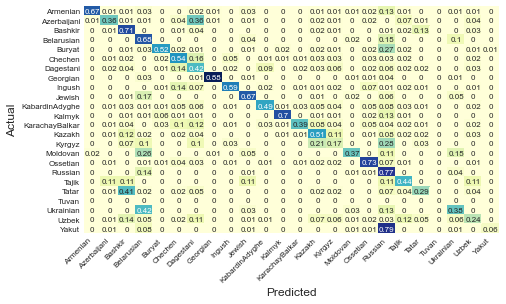

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9982	0.8325	0.6730	0.7443
Azerbaijani    	0.9967	0.0349	0.3556	0.0635
Bashkir        	0.9838	0.2595	0.7119	0.3803
Belarusian     	0.8382	0.3034	0.6778	0.4192
Buryat         	0.9939	0.3062	0.5244	0.3866
Chechen        	0.9913	0.0339	0.5396	0.0638
Dagestani      	0.9896	0.0119	0.4160	0.0231
Georgian       	0.9990	0.6914	0.8761	0.7729
Ingush         	0.9990	0.4097	0.5932	0.4847
Jewish         	0.9677	0.6954	0.6673	0.6811
KabardinAdyghe 	0.9940	0.5933	0.4931	0.5385
Kalmyk         	0.9968	0.6828	0.7019	0.6922
KarachayBalkar 	0.9638	0.9747	0.3879	0.5549
Kazakh         	0.9919	0.1375	0.5053	0.2162
Kyrgyz         	0.9952	0.0012	0.1724	0.0025
Moldovan       	0.9903	0.0706	0.3747	0.1188
Ossetian       	0.9910	0.2648	0.7291	0.3885
Russian        	0.8139	0.9400	0.7730	0.8484
Tajik          	0.9948	0.0009	0.4444	0.0018
Tatar          	0.9824	0.6937	0.2885	0.4075
Tuvan          	0.9996	0.0000	0.0000	0.0000
Ukrainian      	0.9198	0.4094	0.3806	0.3945


C:\Users\DT6\anaconda3\envs\ethnicNames\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0098	0.2364	0.0189
Yakut          	0.9973	0.1196	0.0551	0.0755


C:\Users\DT6\anaconda3\envs\ethnicNames\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.6924115955673886,
 'precision macro': 0.3532197608506878,
 'recall macro': 0.4823918667523426,
 'f1 macro': 0.34491056188981517}

In [21]:
test_model(clf, le, X_train, y_train)

# Same things for aggregated setup

In [22]:
df_agr = df
df_agr.ethn = df.ethn.apply(aggregate_ethnos)
df_translit_ru_agr = filter_data(df_agr)

In [23]:
_, X_train_a, X_test_a, y_train_a, y_test_a = split_data(df_translit_ru_agr, test_size=0.0, le=le_a)

In [24]:
X_train_a = X_train_a[:-1]
y_train_a = y_train_a[:-1]

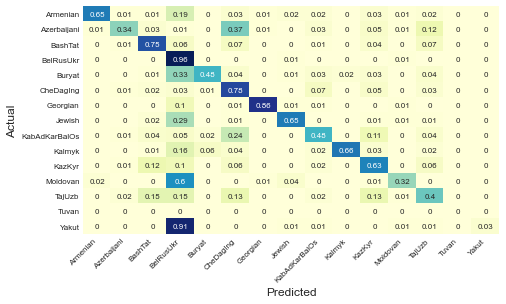

Ethnos          Acc	Prec	Rec	F1
Armenian       	0.9982	0.8534	0.6491	0.7374
Azerbaijani    	0.9979	0.0544	0.3444	0.0940
BashTat        	0.9870	0.7789	0.7457	0.7619
BelRusUkr      	0.9407	0.9678	0.9604	0.9641
Buryat         	0.9952	0.3770	0.4843	0.4240
CheDagIng      	0.9777	0.0556	0.7833	0.1039
Georgian       	0.9992	0.7606	0.8602	0.8074
Jewish         	0.9700	0.7407	0.6470	0.6907
KabAdKarBalOs  	0.9596	0.8813	0.4824	0.6235
Kalmyk         	0.9975	0.8054	0.6609	0.7260
KazKyr         	0.9880	0.1130	0.6294	0.1916
Moldovan       	0.9928	0.0859	0.3238	0.1358
TajUzb         	0.9909	0.0063	0.4034	0.0124
Tuvan          	0.9997	0.0000	0.0000	0.0000
Yakut          	0.9978	

C:\Users\DT6\anaconda3\envs\ethnicNames\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1717	0.0299	0.0509


C:\Users\DT6\anaconda3\envs\ethnicNames\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.8960436968707013,
 'precision macro': 0.4434720943848608,
 'recall macro': 0.5336157518872585,
 'f1 macro': 0.4215694397495915}

In [25]:
test_model(clf_agr, le_a, X_train_a, y_train_a, 'cm_memo_agr.tif')